<a href="https://colab.research.google.com/github/1111parul/PRASUNET-Company-Tasks/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving bank.csv to bank.csv


Accuracy: 0.86
Confusion Matrix:
[[1110   95]
 [  93   59]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1205
           1       0.38      0.39      0.39       152

    accuracy                           0.86      1357
   macro avg       0.65      0.65      0.65      1357
weighted avg       0.86      0.86      0.86      1357



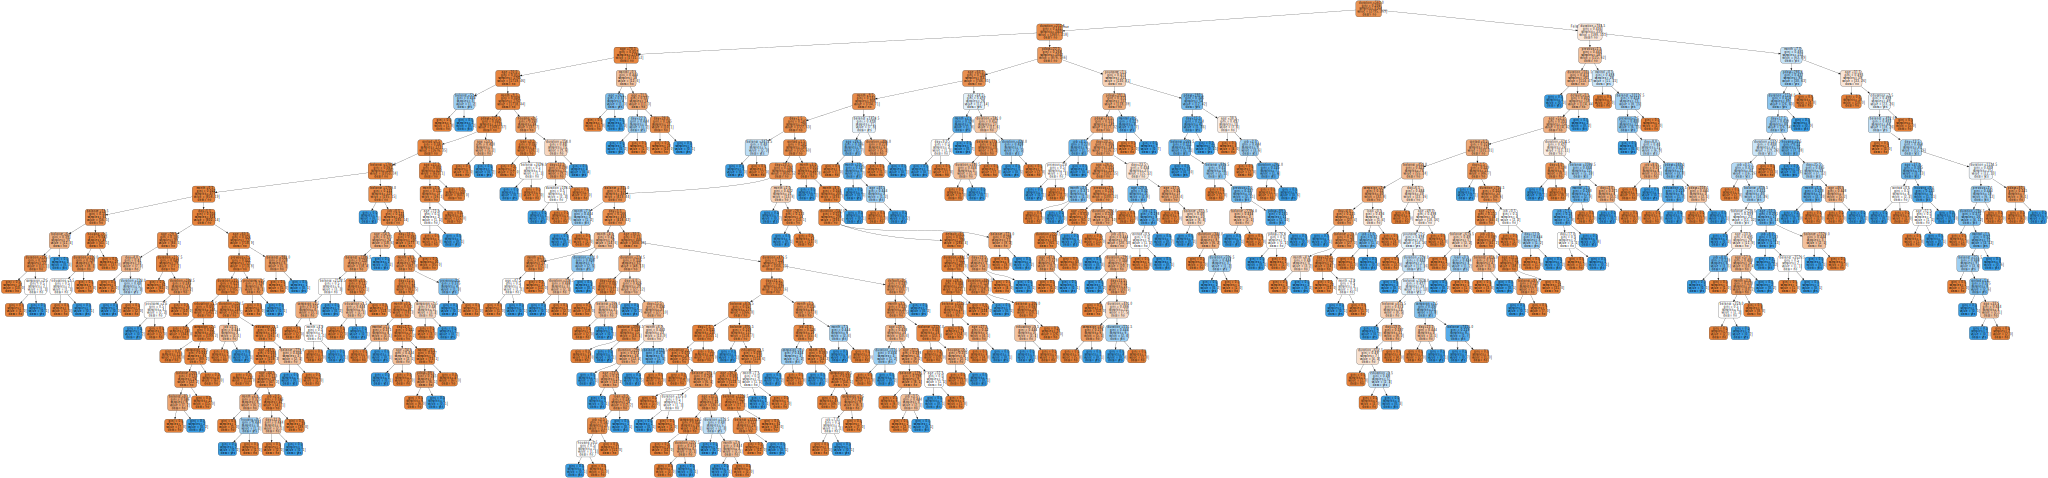

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
import graphviz

# Load the dataset, specifying the delimiter
df = pd.read_csv('bank.csv', delimiter=';') # Use the appropriate delimiter for your CSV file

# Encode categorical features using LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Features (X) and target (y)
X = df.drop('y', axis=1) # Now this should work correctly
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# Visualize the decision tree
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X.columns,
                           class_names=label_encoders['y'].classes_,
                           filled=True, rounded=True,
                           special_characters=True)

# Visualize the tree
graph = graphviz.Source(dot_data)
graph.render("bank_marketing_decision_tree")
graph